## Algoritmo de Kruskal-

### Gerando AGM de Grafos

### Grafo 1:

Tempo de Execução da AGM:  0.027322053909301758
1000
124 - 550: 0.0
329 - 178: 0.0
667 - 705: 0.0
312 - 315: 0.0
619 - 806: 0.0
269 - 732: 0.0
329 - 751: 0.0
10 - 28: 0.0
465 - 606: 0.0
917 - 961: 0.0
298 - 557: 0.0
15 - 703: 0.0
452 - 743: 0.0
120 - 997: 0.0
212 - 386: 0.0
172 - 635: 0.01
205 - 255: 0.01
139 - 289: 0.01
636 - 771: 0.01
175 - 824: 0.01
41 - 961: 0.01
759 - 777: 0.01
35 - 363: 0.01
32 - 739: 0.01
364 - 456: 0.01
24 - 128: 0.01
12 - 934: 0.01
542 - 607: 0.01
765 - 803: 0.01
169 - 647: 0.01
636 - 714: 0.01
382 - 458: 0.01
272 - 851: 0.01
277 - 594: 0.01
251 - 696: 0.01
696 - 843: 0.01
166 - 614: 0.01
765 - 973: 0.01
370 - 917: 0.01
754 - 332: 0.01
915 - 990: 0.01
390 - 662: 0.01
238 - 460: 0.01
296 - 422: 0.01
61 - 185: 0.02
71 - 689: 0.02
468 - 637: 0.02
134 - 274: 0.02
356 - 997: 0.02
397 - 449: 0.02
580 - 906: 0.02
769 - 990: 0.02
579 - 684: 0.02
409 - 622: 0.02
13 - 657: 0.02
108 - 617: 0.02
114 - 409: 0.02
107 - 475: 0.02
256 - 480: 0.02
299 - 364: 0.02
530 - 787: 0.

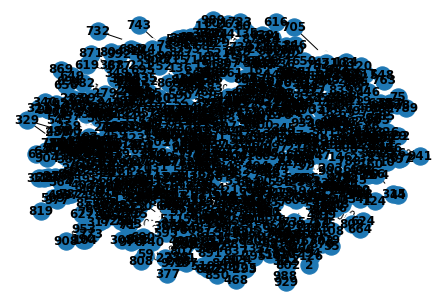

In [19]:
# ---------------------------------------------Classe principal--------------------------------------------------
# importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import time

class Grafo:
    # Método construtor da classe
    def __init__(self, num_vertices):
        self.g_num_vertices = num_vertices
        self.grafo = []
        self.result = []

    # Função para adicionar as arestas
    def add_arestas(self, node1, node2, peso):
        self.grafo.append([node1, node2, peso])

    
    # Acha o nó raiz de uma sub-árvore que contém o nó `i`
    def encontra_sub(self, pai, i):
        if pai[i] == i:
            return i
        return self.encontra_sub(pai, pai[i])

    
    # Conecta as sub-árvores que contêm os nós `x` e `y`
    def conecta_sub(self, pai, tam_sub, x, y):
        x_raiz = self.encontra_sub(pai, x)
        y_raiz = self.encontra_sub(pai, y)
        if tam_sub[x_raiz] < tam_sub[y_raiz]:
            pai[x_raiz] = y_raiz
        elif tam_sub[x_raiz] > tam_sub[y_raiz]:
            pai[y_raiz] = x_raiz
        else:
            pai[y_raiz] = x_raiz
            tam_sub[x_raiz] += 1
    
    
    def mostra_AGM(self, result):
        G = nx.Graph() 
        # Lista aux que armazena a aresta com os seus devidos pesos
        E = []
        i = 0
        custo = 0
        for s, d, w in result:
            E.append((s, d, w))
            print("%s - %s: %s" % (s, d, w))
            i = i + 1
            custo = custo + w
        print(f"\nTotal de arestas: {i}")   
        print(f"Total do custo: {custo}") 
        # Gerando o grafo da AGM
        G.add_weighted_edges_from(E)
        pos=nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold')
        edge_weight = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
        plt.show()
        
    
    def kruskals_AGM(self):
        ini = time.time()
        # Iterador
        i = 0
        # Número das arestas do grafo
        e = 0

        # Ordenando a lista de arestas do grafo de acordo com os seus pesos
        self.grafo = sorted(self.grafo, key=lambda item: item[2])

        # Listas aux
        pai = []
        tam_sub = []

        # Inicializando as listas aux
        for vertice in range(self.g_num_vertices):
            pai.append(vertice)
            tam_sub.append(0)
        
        #criando um conjunto para armazenar os vértices para não precisar fazer uma busca
        vert = set()
        # Critério de parada da AGM: quando o número de arestas for igual ao número de vértice - 1
        while e < (self.g_num_vertices - 1):
            # Pegando uma aresta com o peso mínimo entre as duas geradas, para depois adicionar na AGM a que tiver o menor peso
            vertice_1, vertice_2, peso = self.grafo[i]
            i = i + 1

            x = self.encontra_sub(pai, vertice_1)
            y = self.encontra_sub(pai, vertice_2)
            # Se são diferentes, ou seja, as sub-árvores não estão conectadas, ele adiciona na AGM
            if x != y:
                e = e + 1
                self.result.append([vertice_1+1, vertice_2+1, peso])
                vert.add(vertice_1+1)
                vert.add(vertice_2+1)
                self.conecta_sub(pai, tam_sub, x, y)
        fim = time.time()
        t = (fim-ini)
        print("Tempo de Execução da AGM: ", t)
        print(len(vert))
        self.mostra_AGM(self.result)

# ---------------------------------------------Tratamento dos dados--------------------------------------------------
# abrindo o arquivo:
manipulador = open('grafo_W_1_1.txt', 'r')

# armazenando o número de vértice:
num_vertice = int(manipulador.readline().rstrip())

# armazenando em uma lista as linhas de dados do arquivo, que contêm as arestas com os seus pesos.
lista_aresta = []

for linha in manipulador:
    # fazendo a conversão do tipo string para inteiro
    conversao = list(map(float, linha.split()))
    # adicionando as arestas na lista
    lista_aresta.append(tuple(conversao))

graph = Grafo(num_vertice)

for i in lista_aresta:
    graph.add_arestas(int(i[0])-1, int(i[1])-1, i[2])

graph.kruskals_AGM()


### Grafo 2

In [ ]:
# ---------------------------------------------Classe principal--------------------------------------------------
# importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import time

class Grafo:
    # Método construtor da classe
    def __init__(self, num_vertices):
        self.g_num_vertices = num_vertices
        self.grafo = []
        self.result = []

    # Função para adicionar as arestas
    def add_arestas(self, node1, node2, peso):
        self.grafo.append([node1, node2, peso])

    
    # Acha o nó raiz de uma sub-árvore que contém o nó `i`
    def encontra_sub(self, pai, i):
        if pai[i] == i:
            return i
        return self.encontra_sub(pai, pai[i])

    
    # Conecta as sub-árvores que contêm os nós `x` e `y`
    def conecta_sub(self, pai, tam_sub, x, y):
        x_raiz = self.encontra_sub(pai, x)
        y_raiz = self.encontra_sub(pai, y)
        if tam_sub[x_raiz] < tam_sub[y_raiz]:
            pai[x_raiz] = y_raiz
        elif tam_sub[x_raiz] > tam_sub[y_raiz]:
            pai[y_raiz] = x_raiz
        else:
            pai[y_raiz] = x_raiz
            tam_sub[x_raiz] += 1
    
    
    def mostra_AGM(self, result):
        G = nx.Graph() 
        # Lista aux que armazena a aresta com os seus devidos pesos
        E = []
        i = 0
        custo = 0
        for s, d, w in result:
            E.append((s, d, w))
            print("%s - %s: %s" % (s, d, w))
            i = i + 1
            custo = custo + w
        print(f"\nTotal de arestas: {i}")   
        print(f"Total do custo: {custo}")
        #Gerando o grafo da AGM
        for i in range(1, 10001):
            G.add_node(i)
        G.add_weighted_edges_from(E)
        pos=nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold')
        edge_weight = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
        plt.show()
        
        
    
    def kruskals_AGM(self):
        ini = time.time()
        # Iterador
        i = 0
        # Número das arestas do grafo
        e = 0

        # Ordenando a lista de arestas do grafo de acordo com os seus pesos
        self.grafo = sorted(self.grafo, key=lambda item: item[2])

        # Listas aux
        pai = []
        tam_sub = []

        # Inicializando as listas aux
        for vertice in range(self.g_num_vertices):
            pai.append(vertice)
            tam_sub.append(0)

        #criando um conjunto para armazenar os vértices para não precisar fazer uma busca
        vert = set()
        # Critério de parada da AGM: quando o número de arestas for igual ao número de vértice - 1
        while e < (self.g_num_vertices - 1):
            # Pegando uma aresta com o peso mínimo entre as duas geradas, para depois adicionar na AGM a que tiver o menor peso
            vertice_1, vertice_2, peso = self.grafo[i]
            i = i + 1

            x = self.encontra_sub(pai, vertice_1)
            y = self.encontra_sub(pai, vertice_2)
            # Se são diferentes, ou seja, as sub-árvores não estão conectadas, ele adiciona na AGM
            if x != y:
                e = e + 1
                self.result.append([vertice_1+1, vertice_2+1, peso])
                vert.add(vertice_1+1)
                vert.add(vertice_2+1)
                self.conecta_sub(pai, tam_sub, x, y)
        fim = time.time()
        t = (fim-ini)
        print("Tempo de Execução da AGM: ", t)
        print(len(vert))
        self.mostra_AGM(self.result)

# ---------------------------------------------Tratamento dos dados--------------------------------------------------
# abrindo o arquivo:
manipulador = open('grafo_W_2_1.txt', 'r')

# armazenando o número de vértice:
num_vertice = int(manipulador.readline().rstrip())

# armazenando em uma lista as linhas de dados do arquivo, que contêm as arestas com os seus pesos.
lista_aresta = []

for linha in manipulador:
    # fazendo a conversão do tipo string para inteiro
    conversao = list(map(float, linha.split()))
    # adicionando as arestas na lista
    lista_aresta.append(tuple(conversao))


graph = Grafo(num_vertice)

for i in lista_aresta:
    graph.add_arestas(int(i[0])-1, int(i[1])-1, i[2])


graph.kruskals_AGM()

Tempo de Execução da AGM:  0.26013875007629395
10000
4583 - 9633: 0.0
8069 - 1945: 0.0
1657 - 1488: 0.0
7197 - 9451: 0.0
4131 - 8409: 0.0
7804 - 9908: 0.0
1840 - 5843: 0.0
8073 - 8266: 0.0
7124 - 7355: 0.0
942 - 9040: 0.0
2688 - 4602: 0.0
1440 - 4985: 0.0
1062 - 8177: 0.0
806 - 5807: 0.0
8221 - 3969: 0.0
5480 - 8699: 0.0
4382 - 9785: 0.0
8062 - 7338: 0.0
5096 - 9489: 0.0
1526 - 5715: 0.0
1964 - 3756: 0.0
6548 - 7464: 0.0
4613 - 6722: 0.0
4026 - 6233: 0.0
2404 - 5001: 0.0
2219 - 5182: 0.0
5321 - 9560: 0.0
1986 - 3449: 0.0
2823 - 4989: 0.0
4908 - 6794: 0.0
2485 - 5059: 0.0
4195 - 7750: 0.0
6466 - 8441: 0.0
2236 - 5962: 0.0
2049 - 4719: 0.0
1135 - 6215: 0.0
3432 - 6397: 0.0
4874 - 8400: 0.0
280 - 1742: 0.0
1084 - 9580: 0.0
3816 - 4739: 0.0
5468 - 6454: 0.0
653 - 8792: 0.0
624 - 1358: 0.0
6945 - 9081: 0.0
1505 - 4700: 0.0
4335 - 4388: 0.0
3047 - 4144: 0.0
929 - 2678: 0.0
213 - 5220: 0.0
6214 - 7594: 0.0
7254 - 7875: 0.0
983 - 2572: 0.0
2814 - 9886: 0.0
241 - 6598: 0.0
8576 - 8928: 0.0
121 

### Grafo 3

In [21]:
# ---------------------------------------------Classe principal--------------------------------------------------
# importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import time

class Grafo:
    # Método construtor da classe
    def __init__(self, num_vertices):
        self.g_num_vertices = num_vertices
        self.grafo = []
        self.result = []

    # Função para adicionar as arestas
    def add_arestas(self, node1, node2, peso):
        self.grafo.append([node1, node2, peso])

    
    # Acha o nó raiz de uma sub-árvore que contém o nó `i`
    def encontra_sub(self, pai, i):
        if pai[i] == i:
            return i
        return self.encontra_sub(pai, pai[i])

    
    # Conecta as sub-árvores que contêm os nós `x` e `y`
    def conecta_sub(self, pai, tam_sub, x, y):
        x_raiz = self.encontra_sub(pai, x)
        y_raiz = self.encontra_sub(pai, y)
        if tam_sub[x_raiz] < tam_sub[y_raiz]:
            pai[x_raiz] = y_raiz
        elif tam_sub[x_raiz] > tam_sub[y_raiz]:
            pai[y_raiz] = x_raiz
        else:
            pai[y_raiz] = x_raiz
            tam_sub[x_raiz] += 1
    
    
    def mostra_AGM(self, result):

        G = nx.Graph() 
        # Lista aux que armazena a aresta com os seus devidos pesos
        E = []
        i = 0
        custo = 0
        for s, d, w in result:
            E.append((s, d, w))
            print("%s - %s: %s" % (s, d, w))
            i = i + 1
            custo = custo + w
        print(f"\nTotal de arestas: {i}")   
        print(f"Total do custo: {custo}") 
        # Gerando o grafo da AGM
        #G.add_weighted_edges_from(E)
        #pos=nx.spring_layout(G)
        #nx.draw(G, pos, with_labels=True, font_weight='bold')
        #edge_weight = nx.get_edge_attributes(G,'weight')
        #nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
        #plt.show()
        
    
    def kruskals_AGM(self):
        ini = time.time()
        # Iterador
        i = 0
        # Número das arestas do grafo
        e = 0

        # Ordenando a lista de arestas do grafo de acordo com os seus pesos
        self.grafo = sorted(self.grafo, key=lambda item: item[2])

        # Listas aux
        pai = []
        tam_sub = []

        # Inicializando as listas aux
        for vertice in range(self.g_num_vertices):
            pai.append(vertice)
            tam_sub.append(0)

        #criando um conjunto para armazenar os vértices para não precisar fazer uma busca
        vert = set()
        # Critério de parada da AGM: quando o número de arestas for igual ao número de vértice - 1
        while e < (self.g_num_vertices - 1):
            # Pegando uma aresta com o peso mínimo entre as duas geradas, para depois adicionar na AGM a que tiver o menor peso
            vertice_1, vertice_2, peso = self.grafo[i]
            i = i + 1

            x = self.encontra_sub(pai, vertice_1)
            y = self.encontra_sub(pai, vertice_2)
            # Se são diferentes, ou seja, as sub-árvores não estão conectadas, ele adiciona na AGM
            if x != y:
                e = e + 1
                self.result.append([vertice_1+1, vertice_2+1, peso])
                vert.add(vertice_1+1)
                vert.add(vertice_2+1)
                self.conecta_sub(pai, tam_sub, x, y)
        fim = time.time()
        t = (fim-ini)
        print("Tempo de Execução da AGM: ", t)
        print(len(vert))
        self.mostra_AGM(self.result)

# ---------------------------------------------Tratamento dos dados--------------------------------------------------
# abrindo o arquivo:
manipulador = open('grafo_W_3_1.txt', 'r')

# armazenando o número de vértice:
num_vertice = int(manipulador.readline().rstrip())

# armazenando em uma lista as linhas de dados do arquivo, que contêm as arestas com os seus pesos.
lista_aresta = []
for linha in manipulador:
    # fazendo a conversão do tipo string para inteiro
    conversao = list(map(float, linha.split()))
    # adicionando as arestas na lista
    lista_aresta.append(tuple(conversao))

graph = Grafo(num_vertice)

for i in lista_aresta:
    graph.add_arestas(int(i[0])-1, int(i[1])-1, i[2])

graph.kruskals_AGM()

Tempo de Execução da AGM:  3.455859422683716
100000
54066 - 95973: 0.0
19994 - 63087: 0.0
21178 - 61924: 0.0
32434 - 64159: 0.0
53839 - 56491: 0.0
51299 - 72933: 0.0
20158 - 41491: 0.0
61527 - 61811: 0.0
41463 - 73404: 0.0
66083 - 72375: 0.0
73656 - 81535: 0.0
73648 - 80222: 0.0
54410 - 60179: 0.0
55084 - 82423: 0.0
8739 - 33935: 0.0
15663 - 48805: 0.0
15318 - 66403: 0.0
18768 - 98123: 0.0
27860 - 71615: 0.0
18087 - 40826: 0.0
67537 - 88222: 0.0
1319 - 74280: 0.0
57543 - 84434: 0.0
56059 - 85228: 0.0
13796 - 98904: 0.0
18555 - 88960: 0.0
41085 - 55781: 0.0
33883 - 82491: 0.0
35398 - 91566: 0.0
49876 - 77803: 0.0
27822 - 33544: 0.0
38572 - 43636: 0.0
63006 - 84914: 0.0
35040 - 38516: 0.0
90668 - 97393: 0.0
43876 - 58724: 0.0
2509 - 80301: 0.0
31596 - 92315: 0.0
9402 - 39888: 0.0
2789 - 45939: 0.0
78756 - 95858: 0.0
71778 - 84342: 0.0
61818 - 73267: 0.0
74361 - 92209: 0.0
22573 - 80275: 0.0
1875 - 53213: 0.0
1070 - 53066: 0.0
62936 - 63405: 0.0
27882 - 30166: 0.0
5277 - 65846: 0.0
15050 

### Grafo 4

Tempo de Execução da AGM:  0.47603607177734375
10000
5189 - 8472: -5.0
5102 - 7204: -5.0
4369 - 8520: -5.0
8831 - 9106: -5.0
560 - 4283: -5.0
8174 - 9812: -5.0
1938 - 7675: -5.0
206 - 2920: -5.0
3941 - 8804: -5.0
1864 - 9668: -5.0
3056 - 9737: -5.0
5737 - 8042: -5.0
3249 - 3252: -5.0
5805 - 7216: -5.0
477 - 6799: -5.0
4568 - 5211: -5.0
8720 - 8918: -5.0
2546 - 2566: -5.0
1246 - 5452: -5.0
4897 - 9048: -5.0
4717 - 7802: -5.0
2226 - 5460: -5.0
3407 - 3839: -5.0
225 - 5795: -5.0
2457 - 8618: -5.0
2781 - 4763: -5.0
1029 - 3771: -5.0
2547 - 6498: -5.0
783 - 8712: -5.0
5368 - 8199: -5.0
5367 - 6824: -5.0
716 - 2189: -5.0
3957 - 5841: -5.0
1392 - 8284: -5.0
3213 - 7493: -5.0
1749 - 1813: -5.0
1520 - 3669: -5.0
6931 - 7789: -5.0
1991 - 6716: -5.0
8445 - 9593: -5.0
3696 - 7116: -5.0
130 - 2952: -5.0
5550 - 7011: -4.99
825 - 2438: -4.99
838 - 4668: -4.99
2960 - 5234: -4.99
1306 - 7750: -4.99
4852 - 7081: -4.99
7884 - 9786: -4.99
1016 - 4932: -4.99
3811 - 7987: -4.99
1630 - 4722: -4.99
6960 - 792

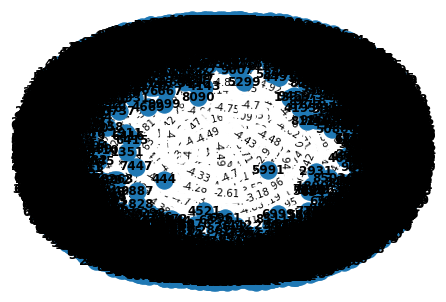

In [22]:
# ---------------------------------------------Classe principal--------------------------------------------------
# importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import time

class Grafo:
    # Método construtor da classe
    def __init__(self, num_vertices):
        self.g_num_vertices = num_vertices
        self.grafo = []
        self.result = []

    # Função para adicionar as arestas
    def add_arestas(self, node1, node2, peso):
        self.grafo.append([node1, node2, peso])

    
    # Acha o nó raiz de uma sub-árvore que contém o nó `i`
    def encontra_sub(self, pai, i):
        if pai[i] == i:
            return i
        return self.encontra_sub(pai, pai[i])

    
    # Conecta as sub-árvores que contêm os nós `x` e `y`
    def conecta_sub(self, pai, tam_sub, x, y):
        x_raiz = self.encontra_sub(pai, x)
        y_raiz = self.encontra_sub(pai, y)
        if tam_sub[x_raiz] < tam_sub[y_raiz]:
            pai[x_raiz] = y_raiz
        elif tam_sub[x_raiz] > tam_sub[y_raiz]:
            pai[y_raiz] = x_raiz
        else:
            pai[y_raiz] = x_raiz
            tam_sub[x_raiz] += 1
    
    
    def mostra_AGM(self, result):

        G = nx.Graph() 
        # Lista aux que armazena a aresta com os seus devidos pesos
        E = []
        i = 0
        custo = 0
        for s, d, w in result:
            E.append((s, d, w))
            print("%s - %s: %s" % (s, d, w))
            i = i + 1
            custo = custo + w
        print(f"\nTotal de arestas: {i}")   
        print(f"Total do custo: {custo}")
        #Gerando o grafo da AGM
        for i in range(1, 10001):
            G.add_node(i)
        G.add_weighted_edges_from(E)
        pos=nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold')
        edge_weight = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
        plt.show()
        
    
    def kruskals_AGM(self):
        ini = time.time()
        # Iterador
        i = 0
        # Número das arestas do grafo
        e = 0

        # Ordenando a lista de arestas do grafo de acordo com os seus pesos
        self.grafo = sorted(self.grafo, key=lambda item: item[2])

        # Listas aux
        pai = []
        tam_sub = []

        # Inicializando as listas aux
        for vertice in range(self.g_num_vertices):
            pai.append(vertice)
            tam_sub.append(0)

        #criando um conjunto para armazenar os vértices para não precisar fazer uma busca
        vert = set()
        # Critério de parada da AGM: quando o número de arestas for igual ao número de vértice - 1
        while e < (self.g_num_vertices - 1):
            # Pegando uma aresta com o peso mínimo entre as duas geradas, para depois adicionar na AGM a que tiver o menor peso
            vertice_1, vertice_2, peso = self.grafo[i]
            i = i + 1

            x = self.encontra_sub(pai, vertice_1)
            y = self.encontra_sub(pai, vertice_2)
            # Se são diferentes, ou seja, as sub-árvores não estão conectadas, ele adiciona na AGM
            if x != y:
                e = e + 1
                self.result.append([vertice_1+1, vertice_2+1, peso])
                vert.add(vertice_1+1)
                vert.add(vertice_2+1)
                self.conecta_sub(pai, tam_sub, x, y)
        fim = time.time()
        t = (fim-ini)
        print("Tempo de Execução da AGM: ", t)
        print(len(vert))
        self.mostra_AGM(self.result)

# ---------------------------------------------Tratamento dos dados--------------------------------------------------
# abrindo o arquivo:
manipulador = open('grafo_W_4_0.txt', 'r')

# armazenando o número de vértice:
num_vertice = int(manipulador.readline().rstrip())

# armazenando em uma lista as linhas de dados do arquivo, que contêm as arestas com os seus pesos.
lista_aresta = []
 
for linha in manipulador:
    # fazendo a conversão do tipo string para inteiro
    conversao = list(map(float, linha.split()))
    # adicionando as arestas na lista
    lista_aresta.append(tuple(conversao))
    
graph = Grafo(num_vertice)

for i in lista_aresta:
    graph.add_arestas(int(i[0])-1, int(i[1])-1, i[2])

graph.kruskals_AGM()